In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metadata = pd.read_table("../data/Metabolome/24_metab_metadata_cleaned.txt", sep='\t', index_col=0)
metadata.head()

,cage_number,timepoint,zt,TP,hours,cycle,collection_timestamp,description,diet,experiment_duration,...,host_subject_id,host_taxid,mouse_number,physical_specimen_location,qiita_study_id,scientific_name,sex,taxon_id,title,treatment
sample-id,,,,,,,,,,,,,,,,,,,,,
A32_133_1B,A32,1,2,one,0,day,12/14/17 8:00,4-8 am collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_2B,A32,2,6,two,4,day,12/14/17 12:00,8 am-12 pm collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_3B,A32,3,10,three,8,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_4B,A32,4,14,four,12,night,12/14/17 20:00,4 pm-8 pm collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_5B,A32,5,18,five,16,night,12/15/17 0:00,8 pm-12 am collection mouse 133,HFD,6 days,...,Mouse 133,10090.0,133,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf


In [3]:
from scipy.stats import mannwhitneyu

# A - Canberra TP Gradient

In [4]:
c_PCoA = pd.read_csv("../data/Metabolome/c_PCoA_axes.txt", sep='\t', index_col=0)
c_PCoA.head()

,Axis1_12_2,Axis2_10_9
sample-id,,
A25_126_3B,59.830557,-111.807212
A24_125_2B,103.742502,62.488667
A24_125_4B,-34.935683,61.310999
A25_126_2B,-30.304864,-114.566775
A25_126_1B,-90.708766,-59.923980


In [5]:
c_PCoA_time = pd.merge(c_PCoA, metadata, left_index=True, right_index=True)
c_PCoA_time.head()

,Axis1_12_2,Axis2_10_9,cage_number,timepoint,zt,TP,hours,cycle,collection_timestamp,description,...,host_subject_id,host_taxid,mouse_number,physical_specimen_location,qiita_study_id,scientific_name,sex,taxon_id,title,treatment
sample-id,,,,,,,,,,,,,,,,,,,,,
A25_126_3B,59.830557,-111.807212,A25,3,10,three,8,day,12/13/17 16:00,12 pm-4 pm collection mouse 126,...,Mouse 126,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber
A24_125_2B,103.742502,62.488667,A24,2,6,two,4,day,12/13/17 12:00,8 am-12 pm collection mouse 125,...,Mouse 125,10090.0,125,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber
A24_125_4B,-34.935683,61.310999,A24,4,14,four,12,night,12/13/17 20:00,4 pm-8 pm collection mouse 125,...,Mouse 125,10090.0,125,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber
A25_126_2B,-30.304864,-114.566775,A25,2,6,two,4,day,12/13/17 12:00,8 am-12 pm collection mouse 126,...,Mouse 126,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber
A25_126_1B,-90.708766,-59.923980,A25,1,2,one,0,day,12/13/17 8:00,4-8 am collection mouse 126,...,Mouse 126,10090.0,126,UCSDMI,11548.0,mouse gut metagenome,male,410661.0,IHC CR,In chamber


In [6]:
c_PCoA_time["both"] = c_PCoA_time['exposure_type'].astype(str) + "_" + c_PCoA_time['zt'].astype(str)

In [7]:
custom_dict = {'Air_2':0, 'Air_6':1, 'Air_10':2, 'Air_14':3, 'Air_18':4, 'Air_22':5, 
                   'IHC_2':6,'IHC_6':7,'IHC_10':8,'IHC_14':9, 'IHC_18':10, 'IHC_22':11}
c_PCoA_time2 = c_PCoA_time.iloc[c_PCoA_time['both'].map(custom_dict).argsort()]
#sort predictably, make it easier to assign colors

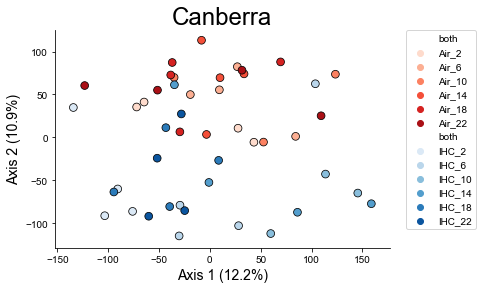

In [8]:
g = sns.scatterplot(x='Axis1_12_2', y='Axis2_10_9', hue="both", palette="Reds", s=60, edgecolor='k',
                data=c_PCoA_time2[c_PCoA_time2["exposure_type"] == "Air"])
g = sns.scatterplot(x='Axis1_12_2', y='Axis2_10_9', hue="both", palette="Blues", s=60, edgecolor='k',
                data=c_PCoA_time2[c_PCoA_time2["exposure_type"] == "IHC"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set_ylabel('Axis 2 (10.9%)', size=14)
g.set_xlabel('Axis 1 (12.2%)', size=14)
sns.despine()
plt.title("Canberra", fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_fig3_panelA.svg', dpi=300, bbox_inches="tight")
#Cage 125 is the odd IHC one

# B - Canberra PCoA Axis 2 over Time

In [9]:
import matplotlib.patches as patches

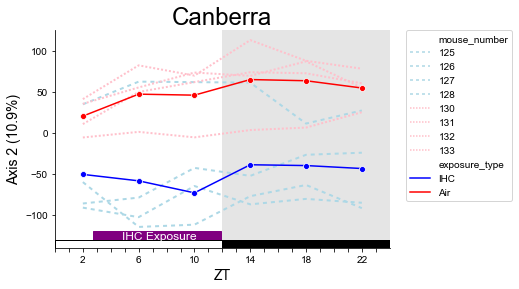

In [10]:
dashall = [(2, 2),(2, 2), (2, 2), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1) ]
ax = sns.lineplot(x='zt', y='Axis2_10_9', hue="mouse_number", style="mouse_number", 
                  palette=['lightblue', 'lightblue', 'lightblue', 'lightblue', 'pink', 'pink', 'pink', 'pink'], 
             estimator=None, lw=2, data=c_PCoA_time, dashes=dashall)
ax = sns.lineplot(x='zt', y='Axis2_10_9', hue='exposure_type', palette=['blue', 'red'], 
             marker="o", ci=None, data=c_PCoA_time)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 24)
plt.ylim(-140, 125)
ax.set_xticks(range(24)) 
ax.set_xticklabels(['', '', '2','', '','', '6','', '','', '10','', '','', '14','', '','', '18','', '','', '22','', '',])

rect = patches.Rectangle((12,-130),12,400,linewidth=1,edgecolor='none',facecolor='k', alpha=0.1)
ax.add_patch(rect)
exp = patches.Rectangle((2.7, -130), 9.2, 10,linewidth=1,edgecolor='purple',facecolor='purple')
ax.add_patch(exp)
day = patches.Rectangle((0,-140), 12, 10,linewidth=1,edgecolor='k',facecolor='w')
ax.add_patch(day)
night = patches.Rectangle((12,-140), 12, 10,linewidth=1,edgecolor='k',facecolor='k')
ax.add_patch(night)
ax.text(7.5, -129, "IHC Exposure", ha='center', size=12, color='w')

ax.set_ylabel('Axis 2 (10.9%)', size=14)
ax.set_xlabel('ZT', size=14)
sns.despine()
plt.title("Canberra", fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_fig3_panelB.svg', dpi=300, bbox_inches="tight")
#Cage 125 is the odd IHC one; Cage 130 is the odd Air one

In [11]:
for tk in c_PCoA_time.zt.unique():
    TP = c_PCoA_time[c_PCoA_time["zt"] == tk]
    p = TP[TP['exposure_type'] == 'Air']
    q = TP[TP['exposure_type'] == 'IHC']
    x = p['Axis2_10_9'].values
    y = q['Axis2_10_9'].values
    w, z = mannwhitneyu(x, y)
    print("ZT", tk)
    print(z)
    print("___________________________")
#significant ZT10, ZT14, ZT18, ZT22
#Trend: ZT6, ZT2

ZT 10
0.04042779918502612
___________________________
ZT 6
0.09696542614120535
___________________________
ZT 14
0.030300984856003035
___________________________
ZT 2
0.056175598845231926
___________________________
ZT 18
0.030300984856003035
___________________________
ZT 22
0.030300984856003035
___________________________


# C - pie chart of distribution of molecules by category

In [12]:
moles = pd.read_csv('../data/Metabolome/cIHC_allunique_noblanks_Cameron.txt', sep='\t', index_col=0)
moles.head()
#raw values

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,TOP19 Psoriasis feature - Unknown FeatureID=3668,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurodeoxycholic acid
A25_126_3B,5.480050e+06,6.437782e+05,1.858553e+07,4.178921e+06,6.582005e+07,3.532043e+07,1.127328e+07,1.248584e+08,1.305419e+07,1.070126e+08,...,1.503057e+06,1.625237e+08,2.599281e+07,3.455895e+07,3.972509e+06,7.092763e+07,1.242296e+08,3.261237e+07,8.497497e+06,4.548074e+06
A24_125_2B,4.101638e+06,8.403904e+05,1.586084e+07,1.147595e+06,1.624845e+07,6.083623e+07,1.222513e+07,9.934156e+07,7.802231e+06,1.029225e+08,...,2.647022e+07,2.215389e+07,1.749046e+07,5.642961e+05,3.430368e+06,4.361527e+07,7.462060e+07,3.363955e+07,9.049529e+06,3.488563e+05
A24_125_4B,1.291337e+07,1.404490e+06,1.734975e+07,1.633418e+07,1.959786e+07,2.534828e+08,2.640127e+07,1.455391e+08,1.711117e+07,1.137783e+08,...,9.383566e+07,5.251490e+07,3.598053e+07,2.845528e+06,1.160620e+07,1.834564e+08,2.941944e+08,2.888392e+07,1.070718e+07,6.090329e+05
A25_126_2B,1.245210e+07,3.586830e+05,1.292355e+08,4.639285e+06,7.962184e+07,3.874662e+08,2.261776e+07,8.323042e+07,4.515364e+07,7.955346e+07,...,4.715221e+07,8.250941e+08,8.244562e+07,4.387471e+07,4.642114e+06,1.327039e+08,4.359186e+08,2.983001e+07,5.141652e+07,6.407710e+07
A25_126_1B,2.293774e+07,9.960390e+05,4.048562e+07,9.742128e+06,4.051302e+07,7.512250e+08,2.424713e+07,9.144582e+07,7.044006e+07,8.548808e+07,...,4.027034e+07,8.376709e+07,3.017734e+07,8.541908e+06,1.293260e+07,2.635715e+08,4.708396e+08,2.938015e+07,6.813926e+06,1.696077e+07


In [13]:
sum_total = moles.values.sum()

In [14]:
bile_acids = [col for col in moles.columns if 'holic' in col]
bile_acids
#no LCA this time

['Cholic acid',
 'Deoxycholic acid',
 'Hyodeoxycholic acid',
 'Spectral Match to 12-Ketodeoxycholic acid from NIST14',
 'Spectral Match to Cholic acid from NIST14',
 'Spectral Match to Ursodeoxycholic acid from NIST14',
 'Tauro-b-muricholic acid',
 'Taurocholic acid',
 'Taurodeoxycholic acid',
 'Ursodeoxycholic acid',
 'a-Muricholic acid',
 'b-Muricholic acid',
 'taurocholic acid',
 'taurodeoxycholic acid']

In [15]:
BAs = moles[bile_acids].values.sum()

In [16]:
cholines = [col for col in moles.columns if 'choline' in col]
more_cholines = [col for col in moles.columns if 'PC' in col]
all_cholines = cholines + more_cholines
all_cholines

['Spectral Match to 1,2-Dilinoleoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-2-tetradecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Heptadecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-octadecadienoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Myristoyl-2-palmitoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Myristoyl-2-stearoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Myristoyl-sn-glycero-3-phospho

In [17]:
PPC = moles[all_cholines].values.sum()

In [18]:
carnitines = [col for col in moles.columns if 'carnit' in col]
carnitines

['Spectral Match to Oleoyl L-carnitine from NIST14',
 'Spectral Match to Palmitoylcarnitine from NIST14']

In [19]:
CARN = moles[carnitines].values.sum()

In [20]:
PE = [col for col in moles.columns if 'phosphoethanolamine' in col]
PE

['Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14',
 'Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14',
 'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14']

In [21]:
PEsum = moles[PE].values.sum()

In [22]:
pentA = [col for col in moles.columns if 'cyclopenta[a]phenanthren' in col]
pentA

['(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(R)-4-((3R

In [23]:
PA = moles[pentA].values.sum()

In [24]:
uro = [col for col in moles.columns if 'bilin' in col]
uro

['Spectral Match to Urobilin from NIST14', 'Stercobilin']

In [25]:
UB = moles[uro].values.sum()

In [26]:
UB/sum_total
#too small, don't include

0.006093360184852965

In [27]:
other = 1 - ((BAs+PA)/sum_total + PPC/sum_total + CARN/sum_total + PEsum/sum_total)
print((BAs+PA)/sum_total)
print(PPC/sum_total)
print(CARN/sum_total)
print(PEsum/sum_total)
print("Other", other)

0.11410070651007947
0.29064558505084365
0.011520952350235475
0.00922919682323525
Other 0.5745035592656061


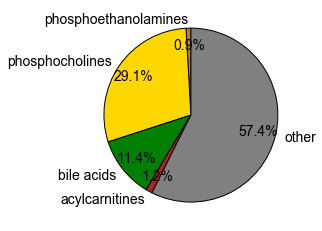

In [28]:
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "acylcarnitines", "other" ]
sizes = [0.9, 29.1, 11.4,  1.2, 57.4]
colors = ["darkgoldenrod","gold", "green", "firebrick", "grey"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('k')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_molecule_piechart.svg', dpi=300, bbox_inches="tight")
plt.show()

In [29]:
All_moles = pd.merge(moles, metadata['exposure_type'], left_index=True, right_index=True)

In [30]:
IHC_moles = All_moles[All_moles['exposure_type'] == "IHC"].copy()
Air_moles = All_moles[All_moles['exposure_type'] == "Air"].copy()

In [31]:
IHC_moles.drop(columns=['exposure_type'], inplace=True)
Air_moles.drop(columns=['exposure_type'], inplace=True)

In [32]:
IHCsum_total = IHC_moles.values.sum()
IHC_PEsum = IHC_moles[PE].values.sum()
IHC_PPC = IHC_moles[all_cholines].values.sum()
IHC_PA = IHC_moles[pentA].values.sum()
IHC_BAs = IHC_moles[bile_acids].values.sum()
IHC_CARN = IHC_moles[carnitines].values.sum()

In [33]:
print("PE", IHC_PEsum/IHCsum_total)
print("PPC", IHC_PPC/IHCsum_total)
print("BAs", (IHC_BAs+IHC_PA)/IHCsum_total)
print("carnitines", IHC_CARN/IHCsum_total)
IHC_other = 1 - (IHC_BAs/IHCsum_total + IHC_PPC/IHCsum_total + IHC_CARN/IHCsum_total + IHC_PEsum/IHCsum_total + IHC_PA/IHCsum_total)
print("Other", IHC_other)

PE 0.010877395928337886
PPC 0.3209736487176569
BAs 0.1299608229248543
carnitines 0.009872455093955049
Other 0.5283156773351958


In [34]:
IHC_UB = IHC_moles[uro].values.sum()
print("bilin", IHC_UB/IHCsum_total)

bilin 0.006886678450177766


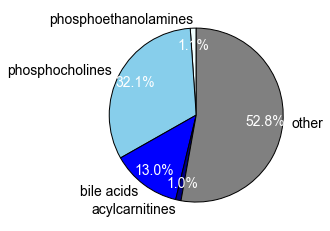

In [35]:
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "acylcarnitines", "other" ]
sizes = [1.1, 32.1, 13.0,  1.0, 52.8]
colors = ["azure","skyblue", "blue", 'navy', "grey"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_molecule_piechart_IHC.svg', dpi=300, bbox_inches="tight")
plt.show()

In [36]:
Airsum_total = Air_moles.values.sum()
Air_PEsum = Air_moles[PE].values.sum()
Air_PPC = Air_moles[all_cholines].values.sum()
Air_PA = Air_moles[pentA].values.sum()
Air_BAs = Air_moles[bile_acids].values.sum()
Air_CARN = Air_moles[carnitines].values.sum()

In [37]:
print("PE", Air_PEsum/Airsum_total)
print("PPC", Air_PPC/Airsum_total)
print("BAs", (Air_BAs+Air_PA)/Airsum_total)
print("carnitines", Air_CARN/Airsum_total)
Air_other = 1 - (Air_BAs/Airsum_total + Air_PPC/Airsum_total + Air_CARN/Airsum_total + Air_PEsum/Airsum_total + Air_PA/Airsum_total)
print("Other", Air_other)

PE 0.007317301133008777
PPC 0.2554653122076041
BAs 0.09570311842377252
carnitines 0.013433193893065612
Other 0.6280810743425489


In [38]:
Air_UB = Air_moles[uro].values.sum()
print("bilin", Air_UB/Airsum_total)

bilin 0.0051731183477128


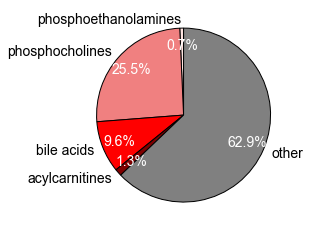

In [39]:
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "acylcarnitines", "other" ]
sizes = [0.7, 25.5, 9.6,  1.3, 62.8]
colors = ["mistyrose","lightcoral", 'red', 'maroon', "grey"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cAir_molecule_piechart_Air.svg', dpi=300, bbox_inches="tight")
plt.show()

# D - BA heatmap

In [40]:
tsn_moles = moles.div(moles.sum(axis=1), axis=0)*100
#total sum normalization of all unique moles, no blanks
tsn_moles.head()

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,TOP19 Psoriasis feature - Unknown FeatureID=3668,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurodeoxycholic acid
A25_126_3B,0.017948,0.002108,0.060870,0.013687,0.215569,0.115679,0.036921,0.408928,0.042754,0.350481,...,0.004923,0.532287,0.085130,0.113185,0.013010,0.232297,0.406869,0.106810,0.027830,0.014896
A24_125_2B,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,...,0.105255,0.088092,0.069548,0.002244,0.013640,0.173429,0.296717,0.133762,0.035984,0.001387
A24_125_4B,0.032289,0.003512,0.043381,0.040842,0.049003,0.633809,0.066014,0.363906,0.042785,0.284491,...,0.234627,0.131308,0.089966,0.007115,0.029020,0.458715,0.735604,0.072221,0.026772,0.001523
A25_126_2B,0.028019,0.000807,0.290796,0.010439,0.179159,0.871847,0.050893,0.187279,0.101601,0.179005,...,0.106098,1.856565,0.185513,0.098724,0.010445,0.298600,0.980871,0.067121,0.115694,0.144181
A25_126_1B,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,...,0.083623,0.173945,0.062664,0.017738,0.026855,0.547315,0.977714,0.061009,0.014149,0.035220


In [41]:
lvl1_BA = ['Cholic acid',
 'Deoxycholic acid',
 'Hyodeoxycholic acid',
 'Tauro-b-muricholic acid',
 'Taurocholic acid',
 'Taurodeoxycholic acid',
 'Ursodeoxycholic acid',
 'a-Muricholic acid',
 'b-Muricholic acid']

In [42]:
bileacids = tsn_moles[lvl1_BA].copy()

In [43]:
all_bileacids = pd.merge(bileacids, metadata[['exposure_type', 'zt']], left_index=True, right_index=True)
all_bileacids.head()

,Cholic acid,Deoxycholic acid,Hyodeoxycholic acid,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,exposure_type,zt
A25_126_3B,0.628601,4.697953,0.008286,0.532287,0.085130,0.113185,0.013010,0.232297,0.406869,IHC,10
A24_125_2B,0.168574,4.425431,0.031296,0.088092,0.069548,0.002244,0.013640,0.173429,0.296717,IHC,6
A24_125_4B,0.054620,7.773205,0.092102,0.131308,0.089966,0.007115,0.029020,0.458715,0.735604,IHC,14
A25_126_2B,1.932819,3.434430,0.052928,1.856565,0.185513,0.098724,0.010445,0.298600,0.980871,IHC,6
A25_126_1B,0.213157,6.859441,0.096259,0.173945,0.062664,0.017738,0.026855,0.547315,0.977714,IHC,2


In [44]:
IHC_bileacids = all_bileacids[all_bileacids['exposure_type'] == "IHC"].sort_values(by='zt', ascending=True)
Air_bileacids = all_bileacids[all_bileacids['exposure_type'] == "Air"].sort_values(by='zt', ascending=True)

In [45]:
Air_bileacids['both'] = Air_bileacids['exposure_type'].astype(str) + "_" + Air_bileacids['zt'].astype(str)

In [46]:
Air_bileacids2 = Air_bileacids.set_index('both')
Air_bileacids2.drop(columns=['exposure_type', 'zt'], inplace=True)
Air_bileacids2.head()

,Cholic acid,Deoxycholic acid,Hyodeoxycholic acid,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid
both,,,,,,,,,
Air_2,0.064042,3.218412,0.044650,0.086115,0.084540,0.001624,0.020006,0.214489,0.395918
Air_2,0.105343,1.619789,0.070195,0.225326,0.095879,0.024605,0.005337,0.450858,0.585892
Air_2,0.118291,5.027341,0.120156,0.157917,0.119578,0.040920,0.055138,0.966531,0.831740
Air_2,0.211533,6.142207,0.079306,0.090192,0.077860,0.017921,0.022897,0.822796,0.964898
Air_6,0.909667,0.901893,0.095322,0.088007,0.080601,0.016329,0.033755,0.701621,0.645534


In [47]:
bileacids_Air = Air_bileacids2.T
bileacids_Air2 = bileacids_Air.groupby(bileacids_Air.columns, axis=1).mean()
bileacids_Air2

both,Air_10,Air_14,Air_18,Air_2,Air_22,Air_6
Cholic acid,0.094191,0.126267,0.107163,0.124802,0.424526,0.263045
Deoxycholic acid,3.031054,3.459325,4.122361,4.001937,3.916620,2.984781
Hyodeoxycholic acid,0.056848,0.135184,0.112684,0.078577,0.087401,0.090176
Tauro-b-muricholic acid,0.099667,0.110635,0.138524,0.139888,0.190281,0.093277
Taurocholic acid,0.092154,0.110574,0.146257,0.094464,0.132610,0.093655
Taurodeoxycholic acid,0.009086,0.004939,0.009327,0.021267,0.055621,0.006277
Ursodeoxycholic acid,0.024317,0.026831,0.021790,0.025845,0.020916,0.022455
a-Muricholic acid,0.450522,0.663080,0.708752,0.613668,0.576572,0.599457
b-Muricholic acid,0.600034,0.789608,0.851586,0.694612,0.847448,0.665031


In [48]:
Air_reorderlist = ['Air_2', 'Air_6', 'Air_10', 'Air_14', 'Air_18', 'Air_22']

In [49]:
bileacids_Air2 = bileacids_Air2[Air_reorderlist]
bileacids_Air2

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22
Cholic acid,0.124802,0.263045,0.094191,0.126267,0.107163,0.424526
Deoxycholic acid,4.001937,2.984781,3.031054,3.459325,4.122361,3.916620
Hyodeoxycholic acid,0.078577,0.090176,0.056848,0.135184,0.112684,0.087401
Tauro-b-muricholic acid,0.139888,0.093277,0.099667,0.110635,0.138524,0.190281
Taurocholic acid,0.094464,0.093655,0.092154,0.110574,0.146257,0.132610
Taurodeoxycholic acid,0.021267,0.006277,0.009086,0.004939,0.009327,0.055621
Ursodeoxycholic acid,0.025845,0.022455,0.024317,0.026831,0.021790,0.020916
a-Muricholic acid,0.613668,0.599457,0.450522,0.663080,0.708752,0.576572
b-Muricholic acid,0.694612,0.665031,0.600034,0.789608,0.851586,0.847448


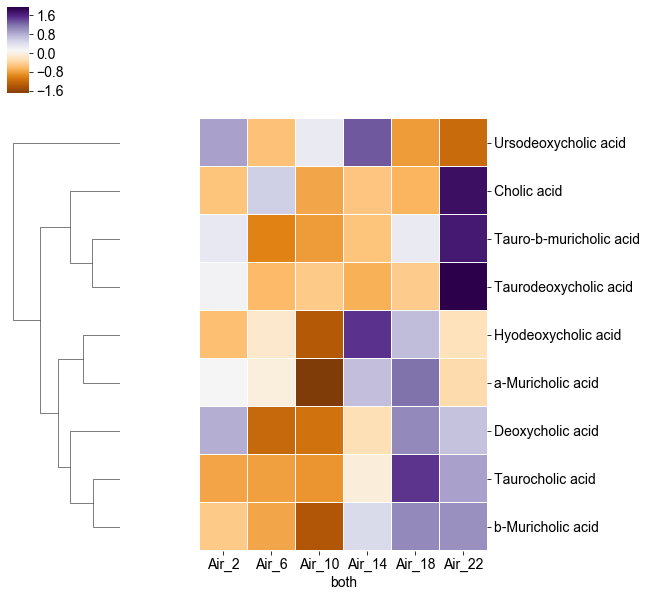

In [50]:
g = sns.clustermap(bileacids_Air2, z_score=0, cmap="PuOr",
               linewidths=0.3, col_cluster=False, square=True)
#plt.savefig('../../../../BA_heatmap.svg', dpi=300, bbox_inches="tight")
Air_row_order = g.dendrogram_row.reordered_ind

In [51]:
reordered_Air = g.data2d
reordered_Air_list = list(reordered_Air.index)

In [52]:
bileacids_Air3 = bileacids_Air2.reindex(reordered_Air_list)
bileacids_Air3

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22
Ursodeoxycholic acid,0.025845,0.022455,0.024317,0.026831,0.021790,0.020916
Cholic acid,0.124802,0.263045,0.094191,0.126267,0.107163,0.424526
Tauro-b-muricholic acid,0.139888,0.093277,0.099667,0.110635,0.138524,0.190281
Taurodeoxycholic acid,0.021267,0.006277,0.009086,0.004939,0.009327,0.055621
Hyodeoxycholic acid,0.078577,0.090176,0.056848,0.135184,0.112684,0.087401
a-Muricholic acid,0.613668,0.599457,0.450522,0.663080,0.708752,0.576572
Deoxycholic acid,4.001937,2.984781,3.031054,3.459325,4.122361,3.916620
Taurocholic acid,0.094464,0.093655,0.092154,0.110574,0.146257,0.132610
b-Muricholic acid,0.694612,0.665031,0.600034,0.789608,0.851586,0.847448


In [53]:
IHC_bileacids['both'] = IHC_bileacids['exposure_type'].astype(str) + "_" + IHC_bileacids['zt'].astype(str)

In [54]:
IHC_bileacids2 = IHC_bileacids.set_index('both')
IHC_bileacids2.drop(columns=['exposure_type', 'zt'], inplace=True)
IHC_bileacids2.head()

,Cholic acid,Deoxycholic acid,Hyodeoxycholic acid,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid
both,,,,,,,,,
IHC_2,0.400655,6.480920,0.084098,0.173021,0.082247,0.001160,0.036305,0.729250,0.636112
IHC_2,0.213157,6.859441,0.096259,0.173945,0.062664,0.017738,0.026855,0.547315,0.977714
IHC_2,0.573187,5.611940,0.039375,0.440287,0.231353,0.022525,0.015752,0.608061,0.702272
IHC_2,0.386299,6.517390,0.077527,0.575401,0.133176,0.064452,0.020791,0.533237,0.721165
IHC_6,0.168574,4.425431,0.031296,0.088092,0.069548,0.002244,0.013640,0.173429,0.296717


In [55]:
bileacids_IHC = IHC_bileacids2.T
bileacids_IHC2 = bileacids_IHC.groupby(bileacids_IHC.columns, axis=1).mean()
bileacids_IHC2

both,IHC_10,IHC_14,IHC_18,IHC_2,IHC_22,IHC_6
Cholic acid,0.239260,0.122546,1.206386,0.393324,0.876556,0.645155
Deoxycholic acid,3.839381,6.208823,6.792422,6.367423,7.580570,5.018348
Hyodeoxycholic acid,0.043410,0.064300,0.123461,0.074315,0.116119,0.047508
Tauro-b-muricholic acid,0.274159,0.243065,1.091563,0.340663,0.485158,0.789953
Taurocholic acid,0.074070,0.105039,0.215411,0.127360,0.124950,0.145059
Taurodeoxycholic acid,0.045193,0.044304,0.034569,0.026469,0.055977,0.048601
Ursodeoxycholic acid,0.015719,0.017231,0.016824,0.024926,0.019657,0.016416
a-Muricholic acid,0.350912,0.378474,0.543235,0.604466,0.578609,0.391047
b-Muricholic acid,0.455146,0.651294,1.097882,0.759316,1.105742,0.586121


In [56]:
IHC_reorderlist = ['IHC_2','IHC_6' ,'IHC_10' ,'IHC_14', 'IHC_18', 'IHC_22', ]

In [57]:
bileacids_IHC2 = bileacids_IHC2[IHC_reorderlist]
bileacids_IHC2

both,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
Cholic acid,0.393324,0.645155,0.239260,0.122546,1.206386,0.876556
Deoxycholic acid,6.367423,5.018348,3.839381,6.208823,6.792422,7.580570
Hyodeoxycholic acid,0.074315,0.047508,0.043410,0.064300,0.123461,0.116119
Tauro-b-muricholic acid,0.340663,0.789953,0.274159,0.243065,1.091563,0.485158
Taurocholic acid,0.127360,0.145059,0.074070,0.105039,0.215411,0.124950
Taurodeoxycholic acid,0.026469,0.048601,0.045193,0.044304,0.034569,0.055977
Ursodeoxycholic acid,0.024926,0.016416,0.015719,0.017231,0.016824,0.019657
a-Muricholic acid,0.604466,0.391047,0.350912,0.378474,0.543235,0.578609
b-Muricholic acid,0.759316,0.586121,0.455146,0.651294,1.097882,1.105742


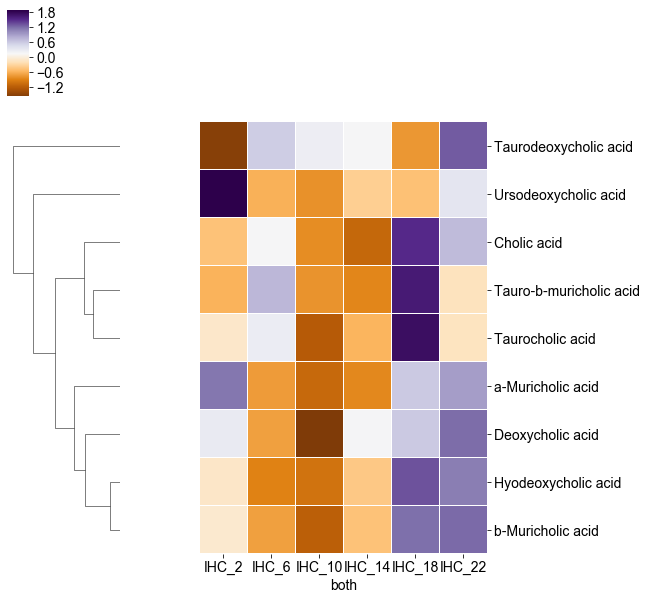

In [58]:
sns.clustermap(bileacids_IHC2, z_score=0, cmap="PuOr",
               linewidths=0.3, col_cluster=False, square=True)
#needed to downgrade matplotlib 3.1.1 has bug

In [59]:
bileacids_IHC3 = bileacids_IHC2.reindex(reordered_Air_list)
bileacids_IHC3

both,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
Ursodeoxycholic acid,0.024926,0.016416,0.015719,0.017231,0.016824,0.019657
Cholic acid,0.393324,0.645155,0.239260,0.122546,1.206386,0.876556
Tauro-b-muricholic acid,0.340663,0.789953,0.274159,0.243065,1.091563,0.485158
Taurodeoxycholic acid,0.026469,0.048601,0.045193,0.044304,0.034569,0.055977
Hyodeoxycholic acid,0.074315,0.047508,0.043410,0.064300,0.123461,0.116119
a-Muricholic acid,0.604466,0.391047,0.350912,0.378474,0.543235,0.578609
Deoxycholic acid,6.367423,5.018348,3.839381,6.208823,6.792422,7.580570
Taurocholic acid,0.127360,0.145059,0.074070,0.105039,0.215411,0.124950
b-Muricholic acid,0.759316,0.586121,0.455146,0.651294,1.097882,1.105742


In [60]:
together = pd.merge(bileacids_Air3, bileacids_IHC3, left_index=True, right_index=True)
together
#mean relative abundances

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
Ursodeoxycholic acid,0.025845,0.022455,0.024317,0.026831,0.021790,0.020916,0.024926,0.016416,0.015719,0.017231,0.016824,0.019657
Cholic acid,0.124802,0.263045,0.094191,0.126267,0.107163,0.424526,0.393324,0.645155,0.239260,0.122546,1.206386,0.876556
Tauro-b-muricholic acid,0.139888,0.093277,0.099667,0.110635,0.138524,0.190281,0.340663,0.789953,0.274159,0.243065,1.091563,0.485158
Taurodeoxycholic acid,0.021267,0.006277,0.009086,0.004939,0.009327,0.055621,0.026469,0.048601,0.045193,0.044304,0.034569,0.055977
Hyodeoxycholic acid,0.078577,0.090176,0.056848,0.135184,0.112684,0.087401,0.074315,0.047508,0.043410,0.064300,0.123461,0.116119
a-Muricholic acid,0.613668,0.599457,0.450522,0.663080,0.708752,0.576572,0.604466,0.391047,0.350912,0.378474,0.543235,0.578609
Deoxycholic acid,4.001937,2.984781,3.031054,3.459325,4.122361,3.916620,6.367423,5.018348,3.839381,6.208823,6.792422,7.580570
Taurocholic acid,0.094464,0.093655,0.092154,0.110574,0.146257,0.132610,0.127360,0.145059,0.074070,0.105039,0.215411,0.124950
b-Muricholic acid,0.694612,0.665031,0.600034,0.789608,0.851586,0.847448,0.759316,0.586121,0.455146,0.651294,1.097882,1.105742


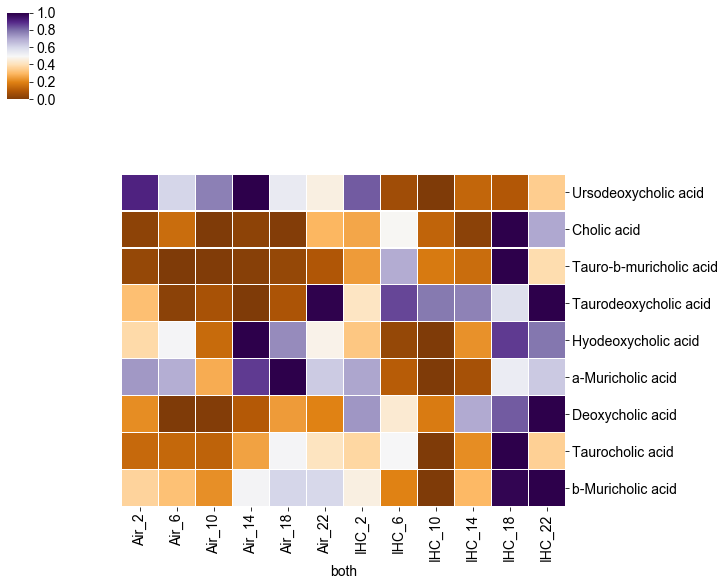

In [61]:
ax1 = sns.clustermap(together, standard_scale=0, cmap="PuOr", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_BA_heatmap.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimal and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

# F - PE, Carnitine, Urobilin, Stercobilin Heatmap

In [62]:
paneld = ['Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14', 
          'Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14', 
          'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14', 
          'Spectral Match to Oleoyl L-carnitine from NIST14', 
          'Spectral Match to Palmitoylcarnitine from NIST14', 'Spectral Match to Urobilin from NIST14', 
          'Stercobilin']

In [63]:
groupfour = tsn_moles[paneld].copy()
groupfour

,Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to Oleoyl L-carnitine from NIST14,Spectral Match to Palmitoylcarnitine from NIST14,Spectral Match to Urobilin from NIST14,Stercobilin
A25_126_3B,0.096697,0.213553,1.164889,0.306107,0.609965,0.475219,0.036264
A24_125_2B,0.148866,0.289993,1.750455,0.406095,0.756383,0.021603,0.025463
A24_125_4B,0.055998,0.156210,1.676134,0.502172,0.683290,0.042688,0.161781
A25_126_2B,0.089876,0.171630,1.168200,0.411243,0.643272,0.715450,0.054728
A25_126_1B,0.072634,0.193190,1.313846,0.325173,0.558958,0.223306,0.078574
A24_125_5B,0.033340,0.101652,0.872248,0.574969,0.713658,0.079957,0.057625
A26_127_2B,0.102092,0.232245,0.724696,0.334546,0.587948,0.107538,0.040020
A25_126_4B,0.058897,0.159093,0.406523,0.556216,0.599059,0.088223,0.072044
A24_125_6B,0.040101,0.127033,0.746853,0.331640,0.399367,0.870598,0.308824
A26_127_3B,0.104377,0.099008,1.445620,0.300051,0.400838,0.062694,0.010215


In [64]:
group4_all = pd.merge(groupfour, metadata[['exposure_type', 'zt']], left_index=True, right_index=True)
group4_all.head()

,Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to Oleoyl L-carnitine from NIST14,Spectral Match to Palmitoylcarnitine from NIST14,Spectral Match to Urobilin from NIST14,Stercobilin,exposure_type,zt
A25_126_3B,0.096697,0.213553,1.164889,0.306107,0.609965,0.475219,0.036264,IHC,10
A24_125_2B,0.148866,0.289993,1.750455,0.406095,0.756383,0.021603,0.025463,IHC,6
A24_125_4B,0.055998,0.156210,1.676134,0.502172,0.683290,0.042688,0.161781,IHC,14
A25_126_2B,0.089876,0.171630,1.168200,0.411243,0.643272,0.715450,0.054728,IHC,6
A25_126_1B,0.072634,0.193190,1.313846,0.325173,0.558958,0.223306,0.078574,IHC,2


In [65]:
IHC_g4 = group4_all[group4_all['exposure_type'] == "IHC"].sort_values(by='zt', ascending=True)
Air_g4 = group4_all[group4_all['exposure_type'] == "Air"].sort_values(by='zt', ascending=True)

In [66]:
Air_g4['both'] = Air_g4['exposure_type'].astype(str) + "_" + Air_g4['zt'].astype(str)

In [67]:
Air_g42 = Air_g4.set_index('both')
Air_g42.drop(columns=['exposure_type', 'zt'], inplace=True)
Air_g42.head()

,Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to Oleoyl L-carnitine from NIST14,Spectral Match to Palmitoylcarnitine from NIST14,Spectral Match to Urobilin from NIST14,Stercobilin
both,,,,,,,
Air_2,0.053310,0.128536,0.955724,0.437008,0.880373,0.885950,0.006806
Air_2,0.095123,0.223145,1.367544,0.275257,0.667047,0.978906,0.177116
Air_2,0.033486,0.096207,0.455362,0.403545,0.930927,1.162369,0.101532
Air_2,0.077943,0.165214,1.041828,0.611255,1.616712,0.202918,0.068769
Air_6,0.056211,0.074691,0.707707,0.548720,1.162062,0.196531,0.046298


In [68]:
g4_Air = Air_g42.T
g4_Air2 = g4_Air.groupby(g4_Air.columns, axis=1).mean()
g4_Air2

both,Air_10,Air_14,Air_18,Air_2,Air_22,Air_6
Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,0.054891,0.036481,0.031669,0.064965,0.040419,0.034553
Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,0.139901,0.076983,0.060755,0.153275,0.092882,0.079915
Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,0.699761,0.525119,0.437979,0.955115,0.371473,0.541797
Spectral Match to Oleoyl L-carnitine from NIST14,0.530715,0.599017,0.445594,0.431766,0.537012,0.580628
Spectral Match to Palmitoylcarnitine from NIST14,1.092517,0.942605,0.542840,1.023765,0.665721,0.887786
Spectral Match to Urobilin from NIST14,0.368402,0.411363,0.235663,0.807536,0.452958,0.300261
Stercobilin,0.058139,0.074639,0.091838,0.088556,0.135175,0.045028


In [69]:
Air_reorderlist = ['Air_2', 'Air_6', 'Air_10', 'Air_14', 'Air_18', 'Air_22']

In [70]:
g4_Air2 = g4_Air2[Air_reorderlist]
g4_Air2

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22
Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,0.064965,0.034553,0.054891,0.036481,0.031669,0.040419
Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,0.153275,0.079915,0.139901,0.076983,0.060755,0.092882
Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,0.955115,0.541797,0.699761,0.525119,0.437979,0.371473
Spectral Match to Oleoyl L-carnitine from NIST14,0.431766,0.580628,0.530715,0.599017,0.445594,0.537012
Spectral Match to Palmitoylcarnitine from NIST14,1.023765,0.887786,1.092517,0.942605,0.542840,0.665721
Spectral Match to Urobilin from NIST14,0.807536,0.300261,0.368402,0.411363,0.235663,0.452958
Stercobilin,0.088556,0.045028,0.058139,0.074639,0.091838,0.135175


In [71]:
IHC_g4['both'] = IHC_g4['exposure_type'].astype(str) + "_" + IHC_g4['zt'].astype(str)

In [72]:
IHC_g42 = IHC_g4.set_index('both')
IHC_g42.drop(columns=['exposure_type', 'zt'], inplace=True)
IHC_g42.head()

,Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,Spectral Match to Oleoyl L-carnitine from NIST14,Spectral Match to Palmitoylcarnitine from NIST14,Spectral Match to Urobilin from NIST14,Stercobilin
both,,,,,,,
IHC_2,0.054058,0.119863,1.026417,0.237538,0.444324,0.771699,0.071562
IHC_2,0.072634,0.193190,1.313846,0.325173,0.558958,0.223306,0.078574
IHC_2,0.091107,0.211475,1.533931,0.315316,0.799709,1.315654,0.373982
IHC_2,0.029337,0.018043,0.810232,0.305279,0.677358,1.027454,0.172395
IHC_6,0.148866,0.289993,1.750455,0.406095,0.756383,0.021603,0.025463


In [73]:
g4_IHC = IHC_g42.T
g4_IHC2 = g4_IHC.groupby(g4_IHC.columns, axis=1).mean()
g4_IHC2

both,IHC_10,IHC_14,IHC_18,IHC_2,IHC_22,IHC_6
Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,0.085603,0.054480,0.019875,0.061784,0.041677,0.101696
Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,0.146725,0.087322,0.066707,0.135643,0.093575,0.201982
Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,1.206645,0.970888,0.580887,1.171107,0.468470,1.149438
Spectral Match to Oleoyl L-carnitine from NIST14,0.340860,0.473738,0.519667,0.295827,0.403234,0.384917
Spectral Match to Palmitoylcarnitine from NIST14,0.564139,0.637176,0.535670,0.620087,0.457621,0.684081
Spectral Match to Urobilin from NIST14,0.357431,0.077479,0.620467,0.834528,0.736490,0.484891
Stercobilin,0.056896,0.067387,0.076164,0.174128,0.126329,0.034368


In [74]:
IHC_reorderlist = ['IHC_2','IHC_6' ,'IHC_10' ,'IHC_14', 'IHC_18', 'IHC_22', ]

In [75]:
g4_IHC2 = g4_IHC2[IHC_reorderlist]
g4_IHC2

both,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,0.061784,0.101696,0.085603,0.054480,0.019875,0.041677
Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,0.135643,0.201982,0.146725,0.087322,0.066707,0.093575
Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,1.171107,1.149438,1.206645,0.970888,0.580887,0.468470
Spectral Match to Oleoyl L-carnitine from NIST14,0.295827,0.384917,0.340860,0.473738,0.519667,0.403234
Spectral Match to Palmitoylcarnitine from NIST14,0.620087,0.684081,0.564139,0.637176,0.535670,0.457621
Spectral Match to Urobilin from NIST14,0.834528,0.484891,0.357431,0.077479,0.620467,0.736490
Stercobilin,0.174128,0.034368,0.056896,0.067387,0.076164,0.126329


In [76]:
together_g4 = pd.merge(g4_Air2, g4_IHC2, left_index=True, right_index=True)
together_g4
#mean relative abundances

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14,0.064965,0.034553,0.054891,0.036481,0.031669,0.040419,0.061784,0.101696,0.085603,0.054480,0.019875,0.041677
Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,0.153275,0.079915,0.139901,0.076983,0.060755,0.092882,0.135643,0.201982,0.146725,0.087322,0.066707,0.093575
Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14,0.955115,0.541797,0.699761,0.525119,0.437979,0.371473,1.171107,1.149438,1.206645,0.970888,0.580887,0.468470
Spectral Match to Oleoyl L-carnitine from NIST14,0.431766,0.580628,0.530715,0.599017,0.445594,0.537012,0.295827,0.384917,0.340860,0.473738,0.519667,0.403234
Spectral Match to Palmitoylcarnitine from NIST14,1.023765,0.887786,1.092517,0.942605,0.542840,0.665721,0.620087,0.684081,0.564139,0.637176,0.535670,0.457621
Spectral Match to Urobilin from NIST14,0.807536,0.300261,0.368402,0.411363,0.235663,0.452958,0.834528,0.484891,0.357431,0.077479,0.620467,0.736490
Stercobilin,0.088556,0.045028,0.058139,0.074639,0.091838,0.135175,0.174128,0.034368,0.056896,0.067387,0.076164,0.126329


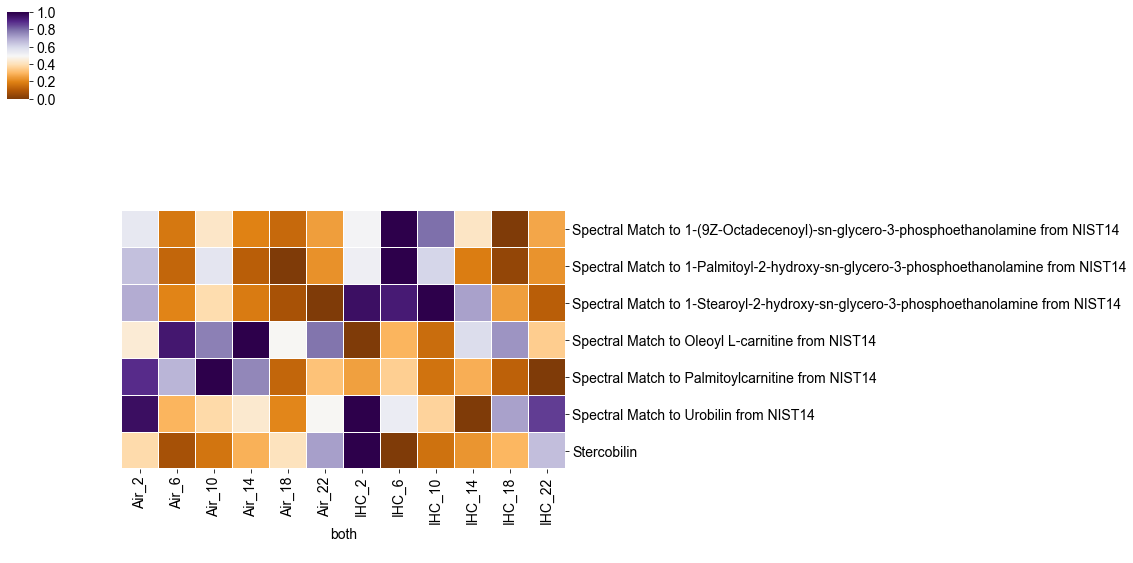

In [77]:
ax1 = sns.clustermap(together_g4, standard_scale=0, cmap="PuOr", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_g4_heatmap.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

# E - Top 16 PPCs as Identified by MetaCycle and Calour

In [78]:
len(all_cholines)

33

In [79]:
ppc_interest = ['PC_18:0_14:0', 'LPC_P-16:0', 'PC_O-16:0_18:1', 'LPC_O-16:0', 'PC_10:0_10:0',
                'PC_16:0_18:1omega9', 'LPC_18:1', 'Lyso-PAF-C16', 'LPC_14:0', 
                'GPC_18:0_18:1', 'PC_16:0_14:0', 'LPC_18:0_0:0', 'DL-PC', 'LPC_20:3', 'Arachidonoylthio-PC']
#13 of interest, about half

In [80]:
top_ppc_renamed = tsn_moles.rename(columns={'Spectral Match to 1-Stearoyl-2-myristoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18:0_14:0', 
                                       'DIDECANOYL-GLYCEROPHOSPHOCHOLINE': 'PC_10:0_10:0', 
                                        'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14': 'LPC_P-16:0', 
                                       'Spectral Match to 1-Hexadecyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14': 'PC_O-16:0_18:1', 
                                       'Spectral Match to Arachidonoylthio-PC from NIST14': 'Arachidonoyl_Thio-PC', 
                                              'PC(O-16:0/18:2); [M+H]+ C42H83N1O7P1': 'LPC_O-16:0', 
                                              'PC(20:3/0:0); [M+H]+ C28H53N1O7P1': 'LPC_20:3', 
                                              'Spectral Match to Lyso-PC(16:0) from NIST14': 'LPC_16:0', 
                                              'Spectral Match to 1-(9Z-Octadecenoyl)-2-tetradecanoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_16:0_18:1omega9',
                                               'Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine from NIST14': 'LPC_18:1', 
                                              'Spectral Match to 1-Hexadecyl-sn-glycero-3-phosphocholine from NIST14': 'Lyso-PAF-C16', 
                                              'Spectral Match to 1-Myristoyl-sn-glycero-3-phosphocholine from NIST14': 'LPC_14:0',
                                              'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'GPC_18:0_18:1', 
                                               'Spectral Match to 1-Palmitoyl-2-myristoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_16:0_14:0', 
                                               'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphocholine from NIST14': 'LPC_18:0_0:0', 
                                              'Spectral Match to 1,2-Dilinoleoyl-sn-glycero-3-phosphocholine from NIST14': 'DL-PC', 
                                           'PC(20:3/0:0); [M+H]+ C28H53N1O7P1': 'LPC_20:3', 
                                           'Spectral Match to Arachidonoylthio-PC from NIST14': 'Arachidonoylthio-PC'})

In [81]:
top_ppc_renamed = top_ppc_renamed[ppc_interest].copy()
top_ppc_renamed.head()

,PC_18:0_14:0,LPC_P-16:0,PC_O-16:0_18:1,LPC_O-16:0,PC_10:0_10:0,PC_16:0_18:1omega9,LPC_18:1,Lyso-PAF-C16,LPC_14:0,GPC_18:0_18:1,PC_16:0_14:0,LPC_18:0_0:0,DL-PC,LPC_20:3,Arachidonoylthio-PC
A25_126_3B,0.376258,0.044066,0.151536,0.015091,0.180453,1.619651,2.187579,0.052457,0.020719,0.135431,0.428840,6.115475,0.066675,0.021596,0.487892
A24_125_2B,0.249394,0.171348,0.000472,0.000568,0.533527,0.114139,2.991154,0.094323,0.161404,0.145224,0.107697,10.407761,0.000431,0.099952,0.041862
A24_125_4B,0.168528,0.330425,0.000087,0.003048,0.521171,0.301362,2.300824,0.157113,0.714868,0.072445,0.132020,9.819634,0.002303,0.073877,0.058978
A25_126_2B,0.509107,0.116740,0.035204,0.009394,0.495069,0.408783,2.205600,0.060119,0.035097,0.082569,0.082454,5.911269,0.067706,0.087926,0.319773
A25_126_1B,0.243399,0.109852,0.046031,0.011868,0.720011,1.361185,2.609996,0.076406,0.182476,0.065044,0.127968,6.991093,0.033635,0.081906,0.188374


In [82]:
top_ppc_all = pd.merge(top_ppc_renamed, metadata[['exposure_type', 'zt']], left_index=True, right_index=True)
top_ppc_all.head()

,PC_18:0_14:0,LPC_P-16:0,PC_O-16:0_18:1,LPC_O-16:0,PC_10:0_10:0,PC_16:0_18:1omega9,LPC_18:1,Lyso-PAF-C16,LPC_14:0,GPC_18:0_18:1,PC_16:0_14:0,LPC_18:0_0:0,DL-PC,LPC_20:3,Arachidonoylthio-PC,exposure_type,zt
A25_126_3B,0.376258,0.044066,0.151536,0.015091,0.180453,1.619651,2.187579,0.052457,0.020719,0.135431,0.428840,6.115475,0.066675,0.021596,0.487892,IHC,10
A24_125_2B,0.249394,0.171348,0.000472,0.000568,0.533527,0.114139,2.991154,0.094323,0.161404,0.145224,0.107697,10.407761,0.000431,0.099952,0.041862,IHC,6
A24_125_4B,0.168528,0.330425,0.000087,0.003048,0.521171,0.301362,2.300824,0.157113,0.714868,0.072445,0.132020,9.819634,0.002303,0.073877,0.058978,IHC,14
A25_126_2B,0.509107,0.116740,0.035204,0.009394,0.495069,0.408783,2.205600,0.060119,0.035097,0.082569,0.082454,5.911269,0.067706,0.087926,0.319773,IHC,6
A25_126_1B,0.243399,0.109852,0.046031,0.011868,0.720011,1.361185,2.609996,0.076406,0.182476,0.065044,0.127968,6.991093,0.033635,0.081906,0.188374,IHC,2


In [83]:
IHC_ppc = top_ppc_all[top_ppc_all['exposure_type'] == "IHC"].sort_values(by='zt', ascending=True)
Air_ppc = top_ppc_all[top_ppc_all['exposure_type'] == "Air"].sort_values(by='zt', ascending=True)

In [84]:
Air_ppc['both'] = Air_ppc['exposure_type'].astype(str) + "_" + Air_ppc['zt'].astype(str)

In [85]:
Air_ppc2 = Air_ppc.set_index('both')
Air_ppc2.drop(columns=['exposure_type', 'zt'], inplace=True)
Air_ppc2.head()

,PC_18:0_14:0,LPC_P-16:0,PC_O-16:0_18:1,LPC_O-16:0,PC_10:0_10:0,PC_16:0_18:1omega9,LPC_18:1,Lyso-PAF-C16,LPC_14:0,GPC_18:0_18:1,PC_16:0_14:0,LPC_18:0_0:0,DL-PC,LPC_20:3,Arachidonoylthio-PC
both,,,,,,,,,,,,,,,
Air_2,0.199929,0.137725,0.009221,0.003157,0.208785,0.523462,2.240944,0.055167,0.076927,0.252884,0.166838,8.410163,0.036067,0.112300,0.165647
Air_2,0.580475,0.047320,0.016255,0.000439,0.498757,0.149815,2.597531,0.113544,0.052678,0.233958,0.069910,6.976803,0.002985,0.077224,0.109835
Air_2,0.187358,0.036517,0.010376,0.001610,0.337612,0.216859,2.083211,0.063343,0.100753,0.119385,0.149773,3.510941,0.013967,0.112522,0.207338
Air_2,0.230629,0.081566,0.004684,0.000929,0.347636,0.248919,2.604086,0.005752,0.239918,0.189650,0.060811,7.328859,0.009718,0.126795,0.076886
Air_6,0.182016,0.107788,0.031097,0.002220,0.106924,0.362167,3.236225,0.065895,0.058525,0.178227,0.535127,5.897430,0.003042,0.249966,0.324290


In [86]:
ppc_Air = Air_ppc2.T
ppc_Air2 = ppc_Air.groupby(ppc_Air.columns, axis=1).mean()
ppc_Air2

both,Air_10,Air_14,Air_18,Air_2,Air_22,Air_6
PC_18:0_14:0,0.416461,0.352332,0.265427,0.299598,0.402971,0.273870
LPC_P-16:0,0.049745,0.177391,0.041736,0.075782,0.038740,0.078243
PC_O-16:0_18:1,0.032752,0.025687,0.018156,0.010134,0.021484,0.025771
LPC_O-16:0,0.000492,0.001928,0.000740,0.001534,0.001355,0.001112
PC_10:0_10:0,0.247026,0.125746,0.435749,0.348198,0.525802,0.215219
PC_16:0_18:1omega9,0.297706,0.218688,0.273437,0.284764,0.155620,0.360541
LPC_18:1,2.362774,1.296790,2.379025,2.381443,2.189480,2.074206
Lyso-PAF-C16,0.051500,0.078005,0.120045,0.059452,0.107898,0.104012
LPC_14:0,0.157007,0.108720,0.067900,0.117569,0.180303,0.156250
GPC_18:0_18:1,0.225183,0.202146,0.222585,0.198970,0.296459,0.238860


In [87]:
Air_reorderlist = ['Air_2', 'Air_6', 'Air_10', 'Air_14', 'Air_18', 'Air_22']

In [88]:
ppc_Air2 = ppc_Air2[Air_reorderlist]
ppc_Air2

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22
PC_18:0_14:0,0.299598,0.273870,0.416461,0.352332,0.265427,0.402971
LPC_P-16:0,0.075782,0.078243,0.049745,0.177391,0.041736,0.038740
PC_O-16:0_18:1,0.010134,0.025771,0.032752,0.025687,0.018156,0.021484
LPC_O-16:0,0.001534,0.001112,0.000492,0.001928,0.000740,0.001355
PC_10:0_10:0,0.348198,0.215219,0.247026,0.125746,0.435749,0.525802
PC_16:0_18:1omega9,0.284764,0.360541,0.297706,0.218688,0.273437,0.155620
LPC_18:1,2.381443,2.074206,2.362774,1.296790,2.379025,2.189480
Lyso-PAF-C16,0.059452,0.104012,0.051500,0.078005,0.120045,0.107898
LPC_14:0,0.117569,0.156250,0.157007,0.108720,0.067900,0.180303
GPC_18:0_18:1,0.198970,0.238860,0.225183,0.202146,0.222585,0.296459


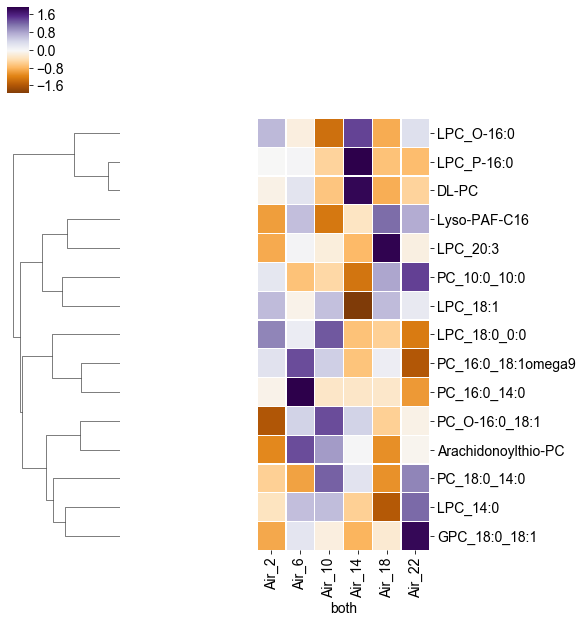

In [89]:
g2 = sns.clustermap(ppc_Air2, z_score=0, cmap="PuOr",
               linewidths=0.3, col_cluster=False, square=True)
#plt.savefig('../../../../PPC_heatmap.svg', dpi=300, bbox_inches="tight")

In [90]:
reordered_Air_ppc = g2.data2d
reordered_Air_ppc_list = list(reordered_Air_ppc.index)

In [91]:
ppc_Air3 = ppc_Air2.reindex(reordered_Air_ppc_list, axis=0)
ppc_Air3

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22
LPC_O-16:0,0.001534,0.001112,0.000492,0.001928,0.000740,0.001355
LPC_P-16:0,0.075782,0.078243,0.049745,0.177391,0.041736,0.038740
DL-PC,0.015684,0.020740,0.007719,0.044330,0.004689,0.009634
Lyso-PAF-C16,0.059452,0.104012,0.051500,0.078005,0.120045,0.107898
LPC_20:3,0.107210,0.152975,0.141840,0.112936,0.244083,0.143316
PC_10:0_10:0,0.348198,0.215219,0.247026,0.125746,0.435749,0.525802
LPC_18:1,2.381443,2.074206,2.362774,1.296790,2.379025,2.189480
LPC_18:0_0:0,6.556691,4.556485,7.146300,2.686016,3.004984,1.430575
PC_16:0_18:1omega9,0.284764,0.360541,0.297706,0.218688,0.273437,0.155620
PC_16:0_14:0,0.111833,0.248764,0.098799,0.098439,0.099966,0.049722


In [92]:
IHC_ppc['both'] = IHC_ppc['exposure_type'].astype(str) + "_" + IHC_ppc['zt'].astype(str)

In [93]:
IHC_ppc2 = IHC_ppc.set_index('both')
IHC_ppc2.drop(columns=['exposure_type', 'zt'], inplace=True)
IHC_ppc2.head()

,PC_18:0_14:0,LPC_P-16:0,PC_O-16:0_18:1,LPC_O-16:0,PC_10:0_10:0,PC_16:0_18:1omega9,LPC_18:1,Lyso-PAF-C16,LPC_14:0,GPC_18:0_18:1,PC_16:0_14:0,LPC_18:0_0:0,DL-PC,LPC_20:3,Arachidonoylthio-PC
both,,,,,,,,,,,,,,,
IHC_2,0.237438,0.067667,0.050823,0.002062,0.571897,0.806450,2.013061,0.057331,0.099381,0.091083,0.078642,4.761666,0.032260,0.026191,0.419158
IHC_2,0.243399,0.109852,0.046031,0.011868,0.720011,1.361185,2.609996,0.076406,0.182476,0.065044,0.127968,6.991093,0.033635,0.081906,0.188374
IHC_2,0.111650,0.051576,0.000905,0.000113,0.648404,0.013031,2.604402,0.090417,0.061322,0.047910,0.016309,7.799239,0.002024,0.043369,0.019008
IHC_2,0.443819,0.048765,0.038310,0.002007,0.310147,0.684947,2.100772,0.054741,0.045165,0.182824,0.085933,4.351159,0.016978,0.095521,0.353710
IHC_6,0.249394,0.171348,0.000472,0.000568,0.533527,0.114139,2.991154,0.094323,0.161404,0.145224,0.107697,10.407761,0.000431,0.099952,0.041862


In [94]:
ppc_IHC = IHC_ppc2.T
ppc_IHC2 = ppc_IHC.groupby(ppc_IHC.columns, axis=1).mean()
ppc_IHC2

both,IHC_10,IHC_14,IHC_18,IHC_2,IHC_22,IHC_6
PC_18:0_14:0,0.621780,0.590144,0.270353,0.259077,0.199755,0.460330
LPC_P-16:0,0.253019,0.200079,0.036456,0.069465,0.052495,0.135863
PC_O-16:0_18:1,0.082933,0.035405,0.023106,0.034018,0.031146,0.054864
LPC_O-16:0,0.006172,0.003268,0.002098,0.004012,0.004103,0.003411
PC_10:0_10:0,0.226070,0.363310,0.609932,0.562615,0.647793,0.482291
PC_16:0_18:1omega9,0.879305,0.581888,0.372664,0.716403,0.591051,0.341330
LPC_18:1,2.158298,2.068812,1.828136,2.332058,2.102133,2.464842
Lyso-PAF-C16,0.076398,0.076067,0.071832,0.069724,0.094776,0.074487
LPC_14:0,0.033221,0.205482,0.119876,0.097086,0.138923,0.071008
GPC_18:0_18:1,0.261958,0.273938,0.192145,0.096716,0.173992,0.162293


In [95]:
IHC_reorderlist = ['IHC_2','IHC_6' ,'IHC_10' ,'IHC_14', 'IHC_18', 'IHC_22', ]

In [96]:
ppc_IHC2 = ppc_IHC2[IHC_reorderlist]
ppc_IHC2

both,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
PC_18:0_14:0,0.259077,0.460330,0.621780,0.590144,0.270353,0.199755
LPC_P-16:0,0.069465,0.135863,0.253019,0.200079,0.036456,0.052495
PC_O-16:0_18:1,0.034018,0.054864,0.082933,0.035405,0.023106,0.031146
LPC_O-16:0,0.004012,0.003411,0.006172,0.003268,0.002098,0.004103
PC_10:0_10:0,0.562615,0.482291,0.226070,0.363310,0.609932,0.647793
PC_16:0_18:1omega9,0.716403,0.341330,0.879305,0.581888,0.372664,0.591051
LPC_18:1,2.332058,2.464842,2.158298,2.068812,1.828136,2.102133
Lyso-PAF-C16,0.069724,0.074487,0.076398,0.076067,0.071832,0.094776
LPC_14:0,0.097086,0.071008,0.033221,0.205482,0.119876,0.138923
GPC_18:0_18:1,0.096716,0.162293,0.261958,0.273938,0.192145,0.173992


In [97]:
ppc_IHC3 = ppc_IHC2.reindex(reordered_Air_ppc_list, axis=0)
ppc_IHC3

both,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
LPC_O-16:0,0.004012,0.003411,0.006172,0.003268,0.002098,0.004103
LPC_P-16:0,0.069465,0.135863,0.253019,0.200079,0.036456,0.052495
DL-PC,0.021224,0.025627,0.060085,0.058385,0.012697,0.035194
Lyso-PAF-C16,0.069724,0.074487,0.076398,0.076067,0.071832,0.094776
LPC_20:3,0.061747,0.072072,0.075513,0.083437,0.098417,0.054193
PC_10:0_10:0,0.562615,0.482291,0.226070,0.363310,0.609932,0.647793
LPC_18:1,2.332058,2.464842,2.158298,2.068812,1.828136,2.102133
LPC_18:0_0:0,5.975789,6.114288,6.130924,5.655570,3.616995,4.743105
PC_16:0_18:1omega9,0.716403,0.341330,0.879305,0.581888,0.372664,0.591051
PC_16:0_14:0,0.077213,0.092367,0.184474,0.191480,0.082426,0.075127


In [98]:
together_ppc = pd.merge(ppc_Air3, ppc_IHC3, left_index=True, right_index=True)
together_ppc
#mean relative abundances table ordered the way I want

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
LPC_O-16:0,0.001534,0.001112,0.000492,0.001928,0.000740,0.001355,0.004012,0.003411,0.006172,0.003268,0.002098,0.004103
LPC_P-16:0,0.075782,0.078243,0.049745,0.177391,0.041736,0.038740,0.069465,0.135863,0.253019,0.200079,0.036456,0.052495
DL-PC,0.015684,0.020740,0.007719,0.044330,0.004689,0.009634,0.021224,0.025627,0.060085,0.058385,0.012697,0.035194
Lyso-PAF-C16,0.059452,0.104012,0.051500,0.078005,0.120045,0.107898,0.069724,0.074487,0.076398,0.076067,0.071832,0.094776
LPC_20:3,0.107210,0.152975,0.141840,0.112936,0.244083,0.143316,0.061747,0.072072,0.075513,0.083437,0.098417,0.054193
PC_10:0_10:0,0.348198,0.215219,0.247026,0.125746,0.435749,0.525802,0.562615,0.482291,0.226070,0.363310,0.609932,0.647793
LPC_18:1,2.381443,2.074206,2.362774,1.296790,2.379025,2.189480,2.332058,2.464842,2.158298,2.068812,1.828136,2.102133
LPC_18:0_0:0,6.556691,4.556485,7.146300,2.686016,3.004984,1.430575,5.975789,6.114288,6.130924,5.655570,3.616995,4.743105
PC_16:0_18:1omega9,0.284764,0.360541,0.297706,0.218688,0.273437,0.155620,0.716403,0.341330,0.879305,0.581888,0.372664,0.591051
PC_16:0_14:0,0.111833,0.248764,0.098799,0.098439,0.099966,0.049722,0.077213,0.092367,0.184474,0.191480,0.082426,0.075127


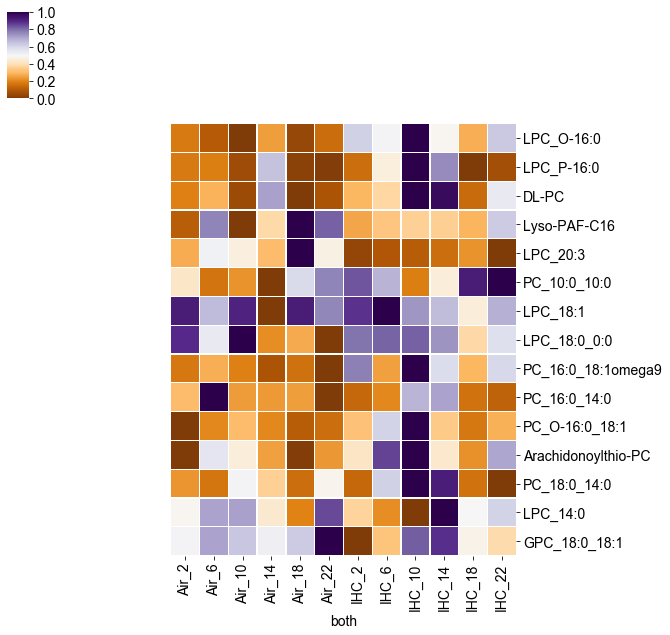

In [99]:
ax1 = sns.clustermap(together_ppc, standard_scale=0, cmap="PuOr", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_ppc_heatmap_mappedAir.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

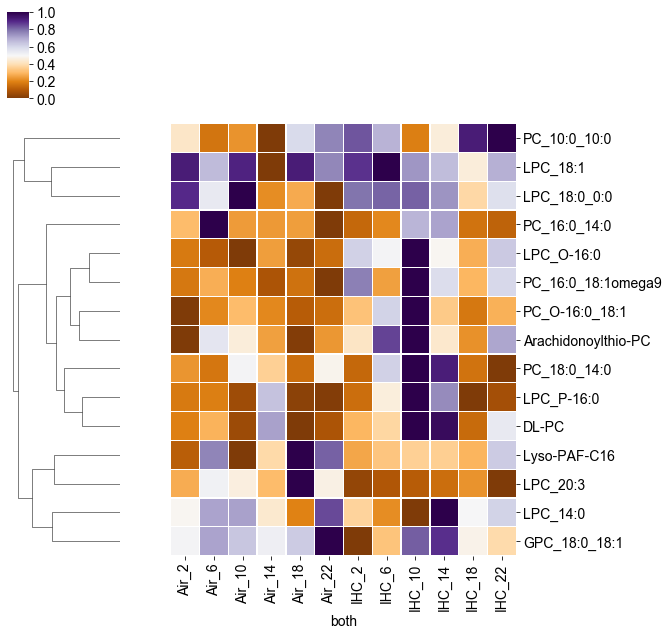

In [100]:
ax1 = sns.clustermap(together_ppc, standard_scale=0, cmap="PuOr", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_ppc_heatmap.svg', dpi=300, bbox_inches="tight")
#allows reordering of rows
#standard scale subtracts the minimul and divides every row by maximum
#DL-PC AKA 18:2-18:2-PC. Interesting that it now naturally clusters small chain to large chains.

# Supplement - additional and new bile acids

In [101]:
top_adma_renamed = tsn_moles.rename(columns={'(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid',
 '(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'Allochenodeoxycholic acid',
 '(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid',
 '(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'ursocholic acid',
 '(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid',
 '(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid',
 '(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid',
 '(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'murocholic acid',
 '(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': 'cholic acid',
 '(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid': '(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid',
 'Massbank:PB000419 Arginine|2-amino-5-(diaminomethylideneamino)pentanoic acid': 'DL-Arginine', 
'(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid': '(3α,5β,12α,22E)-3,12-Dihydroxychol-22-en-24-oic acid'})
# allo-chenodeoxycholate = Flat Bile Acids,  Typically Fetal BA Species: https://dx.doi.org/10.1016%2Fj.bbamem.2017.08.019
#muro-CA http://dx.doi.org/10.1021/jm7015864

In [102]:
adma_interest = ['3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid', 'Allochenodeoxycholic acid', 
                 '(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid', 'ursocholic acid', 
                 '(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid', '(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid', 
                 '(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid', 'murocholic acid', 
                 'cholic acid', '(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid', 'DL-Arginine']
#13 of interest, about half

In [103]:
top_adma_renamed = top_adma_renamed[adma_interest].copy()
top_adma_renamed.head()

,"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",Allochenodeoxycholic acid,"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",ursocholic acid,"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid","(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid","(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",murocholic acid,cholic acid,"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",DL-Arginine
A25_126_3B,0.017948,0.002108,0.060870,0.013687,0.215569,0.115679,0.036921,0.408928,0.042754,0.350481,0.510258
A24_125_2B,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,0.346378
A24_125_4B,0.032289,0.003512,0.043381,0.040842,0.049003,0.633809,0.066014,0.363906,0.042785,0.284491,0.180600
A25_126_2B,0.028019,0.000807,0.290796,0.010439,0.179159,0.871847,0.050893,0.187279,0.101601,0.179005,0.651786
A25_126_1B,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,0.248505


In [104]:
top_adma_all = pd.merge(top_adma_renamed, metadata[['exposure_type', 'zt']], left_index=True, right_index=True)
top_adma_all

,"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",Allochenodeoxycholic acid,"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",ursocholic acid,"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid","(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid","(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",murocholic acid,cholic acid,"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",DL-Arginine,exposure_type,zt
A25_126_3B,0.017948,0.002108,0.060870,0.013687,0.215569,0.115679,0.036921,0.408928,0.042754,0.350481,0.510258,IHC,10
A24_125_2B,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,0.346378,IHC,6
A24_125_4B,0.032289,0.003512,0.043381,0.040842,0.049003,0.633809,0.066014,0.363906,0.042785,0.284491,0.180600,IHC,14
A25_126_2B,0.028019,0.000807,0.290796,0.010439,0.179159,0.871847,0.050893,0.187279,0.101601,0.179005,0.651786,IHC,6
A25_126_1B,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,0.248505,IHC,2
A24_125_5B,0.038647,0.002650,0.076602,0.026620,0.122770,1.066595,0.091877,0.411458,0.146438,0.304713,0.197697,IHC,18
A26_127_2B,0.035229,0.001047,0.088078,0.018351,0.159557,0.197372,0.061020,0.356218,0.048762,0.281392,0.252662,IHC,6
A25_126_4B,0.016909,0.001367,0.033081,0.011940,0.283826,0.120703,0.031350,0.591984,0.026861,0.452982,0.428298,IHC,14
A24_125_6B,0.037654,0.005182,0.065089,0.031157,0.053401,1.396737,0.084457,0.537383,0.127835,0.407259,0.162988,IHC,22
A26_127_3B,0.027123,0.003627,0.045556,0.017477,0.281117,0.148392,0.051714,0.530581,0.040001,0.422410,0.478896,IHC,10


In [105]:
IHC_adma = top_adma_all[top_adma_all['exposure_type'] == "IHC"].sort_values(by='zt', ascending=True)
Air_adma = top_adma_all[top_adma_all['exposure_type'] == "Air"].sort_values(by='zt', ascending=True)

In [106]:
Air_adma['both'] = Air_adma['exposure_type'].astype(str) + "_" + Air_adma['zt'].astype(str)

In [107]:
Air_adma2 = Air_adma.set_index('both')
Air_adma2.drop(columns=['exposure_type', 'zt'], inplace=True)
Air_adma2.head()

,"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",Allochenodeoxycholic acid,"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",ursocholic acid,"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid","(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid","(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",murocholic acid,cholic acid,"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",DL-Arginine
both,,,,,,,,,,,
Air_2,0.028728,0.001551,0.060783,0.026129,0.090987,1.258128,0.055863,0.290484,0.155035,0.350565,0.480619
Air_2,0.040465,0.010176,0.069377,0.008794,0.073719,0.422473,0.050312,0.292560,0.107645,0.336873,0.350231
Air_2,0.049970,0.000881,0.074682,0.027098,0.056560,0.787028,0.069756,0.224059,0.234068,0.201969,0.263461
Air_2,0.064537,0.001364,0.150321,0.043099,0.068609,1.847430,0.118395,0.347233,0.097455,0.324329,0.363228
Air_6,0.049499,0.001282,0.083771,0.027106,0.029185,0.573725,0.090279,0.353145,0.097706,0.855209,0.345115


In [108]:
adma_Air = Air_adma2.T
adma_Air2 = adma_Air.groupby(adma_Air.columns, axis=1).mean()
adma_Air2

both,Air_10,Air_14,Air_18,Air_2,Air_22,Air_6
"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",0.037999,0.051263,0.053576,0.045925,0.053290,0.046267
Allochenodeoxycholic acid,0.001383,0.013412,0.007259,0.003493,0.003848,0.008432
"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.093055,0.089450,0.081680,0.088791,0.085200,0.081053
ursocholic acid,0.027039,0.035593,0.059562,0.026280,0.046337,0.039624
"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid",0.115704,0.094419,0.092149,0.072468,0.075538,0.060652
"(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid",1.450342,0.768195,0.888906,1.078765,0.631002,0.922681
"(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.076696,0.134187,0.073389,0.073582,0.092983,0.093275
murocholic acid,0.330687,0.407071,0.186482,0.288584,0.185404,0.328197
cholic acid,0.173528,0.145774,0.121884,0.148551,0.128379,0.134919
"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",0.452790,0.375518,0.351053,0.303434,0.344507,0.489820


In [109]:
Air_reorderlist = ['Air_2', 'Air_6', 'Air_10', 'Air_14', 'Air_18', 'Air_22']

In [110]:
adma_Air2 = adma_Air2[Air_reorderlist]
adma_Air2

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22
"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",0.045925,0.046267,0.037999,0.051263,0.053576,0.053290
Allochenodeoxycholic acid,0.003493,0.008432,0.001383,0.013412,0.007259,0.003848
"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.088791,0.081053,0.093055,0.089450,0.081680,0.085200
ursocholic acid,0.026280,0.039624,0.027039,0.035593,0.059562,0.046337
"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid",0.072468,0.060652,0.115704,0.094419,0.092149,0.075538
"(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid",1.078765,0.922681,1.450342,0.768195,0.888906,0.631002
"(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.073582,0.093275,0.076696,0.134187,0.073389,0.092983
murocholic acid,0.288584,0.328197,0.330687,0.407071,0.186482,0.185404
cholic acid,0.148551,0.134919,0.173528,0.145774,0.121884,0.128379
"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",0.303434,0.489820,0.452790,0.375518,0.351053,0.344507


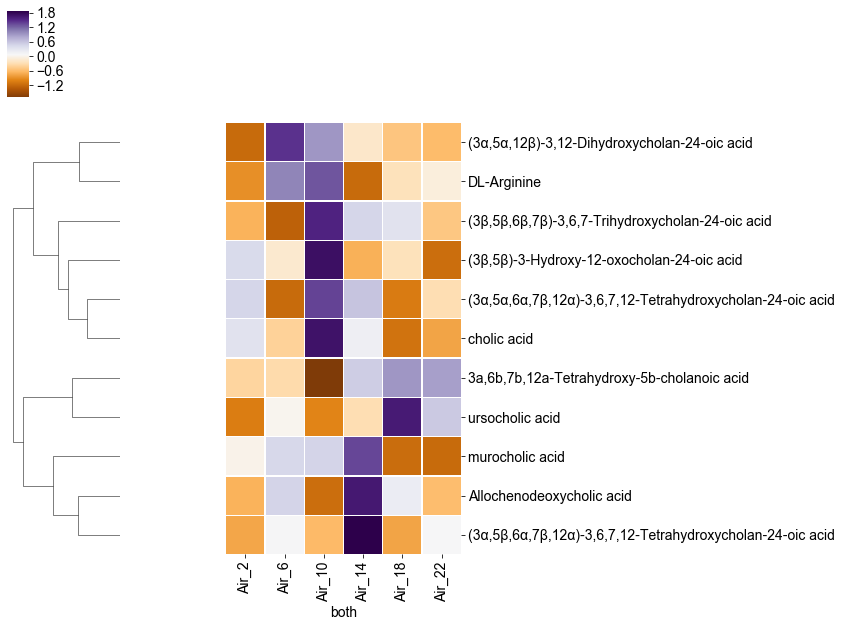

In [111]:
g3 = sns.clustermap(adma_Air2, z_score=0, cmap="PuOr",
               linewidths=0.3, col_cluster=False, square=True)

In [112]:
reordered_Air_adma = g3.data2d
reordered_Air_adma_list = list(reordered_Air_adma.index)

In [113]:
adma_Air3 = adma_Air2.reindex(reordered_Air_adma_list)
adma_Air3

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22
"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",0.303434,0.489820,0.452790,0.375518,0.351053,0.344507
DL-Arginine,0.364385,0.530569,0.552331,0.339935,0.420841,0.435571
"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid",0.072468,0.060652,0.115704,0.094419,0.092149,0.075538
"(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid",1.078765,0.922681,1.450342,0.768195,0.888906,0.631002
"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.088791,0.081053,0.093055,0.089450,0.081680,0.085200
cholic acid,0.148551,0.134919,0.173528,0.145774,0.121884,0.128379
"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",0.045925,0.046267,0.037999,0.051263,0.053576,0.053290
ursocholic acid,0.026280,0.039624,0.027039,0.035593,0.059562,0.046337
murocholic acid,0.288584,0.328197,0.330687,0.407071,0.186482,0.185404
Allochenodeoxycholic acid,0.003493,0.008432,0.001383,0.013412,0.007259,0.003848


In [114]:
IHC_adma['both'] = IHC_adma['exposure_type'].astype(str) + "_" + IHC_adma['zt'].astype(str)

In [115]:
IHC_adma2 = IHC_adma.set_index('both')
IHC_adma2.drop(columns=['exposure_type', 'zt'], inplace=True)
IHC_adma2.head()

,"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",Allochenodeoxycholic acid,"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",ursocholic acid,"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid","(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid","(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",murocholic acid,cholic acid,"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",DL-Arginine
both,,,,,,,,,,,
IHC_2,0.048678,0.001760,0.101241,0.027564,0.059147,0.430064,0.051714,0.157911,0.170705,0.163176,0.258024
IHC_2,0.047631,0.002068,0.084070,0.020230,0.084127,1.559944,0.050350,0.189890,0.146271,0.177519,0.248505
IHC_2,0.019668,0.003216,0.350164,0.027697,0.050022,0.700520,0.088767,0.195100,0.055956,0.161574,0.207903
IHC_2,0.036018,0.000779,0.071255,0.015031,0.085924,0.369155,0.066032,0.042632,0.087013,0.178863,0.426499
IHC_6,0.016310,0.003342,0.063068,0.004563,0.064609,0.241906,0.048611,0.395016,0.031024,0.409256,0.346378


In [116]:
adma_IHC = IHC_adma2.T
adma_IHC2 = adma_IHC.groupby(adma_IHC.columns, axis=1).mean()
adma_IHC2

both,IHC_10,IHC_14,IHC_18,IHC_2,IHC_22,IHC_6
"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",0.020160,0.025114,0.041372,0.037999,0.038181,0.030471
Allochenodeoxycholic acid,0.002357,0.002308,0.002141,0.001956,0.004429,0.001732
"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.043136,0.046069,0.109542,0.151683,0.100685,0.133906
ursocholic acid,0.013901,0.023918,0.025825,0.022630,0.029534,0.011286
"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid",0.215516,0.168414,0.114941,0.069805,0.125146,0.134411
"(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid",0.138089,0.257802,0.567615,0.764921,0.734500,0.648148
"(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.046114,0.055042,0.091739,0.064216,0.086068,0.057841
murocholic acid,0.465916,0.459564,0.262345,0.146383,0.409103,0.321279
cholic acid,0.043879,0.031285,0.091130,0.114986,0.064345,0.065160
"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",0.373717,0.342570,0.263630,0.170283,0.319274,0.278303


In [117]:
IHC_reorderlist = ['IHC_2','IHC_6' ,'IHC_10' ,'IHC_14', 'IHC_18', 'IHC_22', ]

In [118]:
adma_IHC2 = adma_IHC2[IHC_reorderlist]
adma_IHC2

both,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",0.037999,0.030471,0.020160,0.025114,0.041372,0.038181
Allochenodeoxycholic acid,0.001956,0.001732,0.002357,0.002308,0.002141,0.004429
"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.151683,0.133906,0.043136,0.046069,0.109542,0.100685
ursocholic acid,0.022630,0.011286,0.013901,0.023918,0.025825,0.029534
"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid",0.069805,0.134411,0.215516,0.168414,0.114941,0.125146
"(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid",0.764921,0.648148,0.138089,0.257802,0.567615,0.734500
"(3α,5β,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.064216,0.057841,0.046114,0.055042,0.091739,0.086068
murocholic acid,0.146383,0.321279,0.465916,0.459564,0.262345,0.409103
cholic acid,0.114986,0.065160,0.043879,0.031285,0.091130,0.064345
"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",0.170283,0.278303,0.373717,0.342570,0.263630,0.319274


In [119]:
adma_IHC3= adma_IHC2.reindex(reordered_Air_adma_list)
adma_IHC3

both,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",0.170283,0.278303,0.373717,0.342570,0.263630,0.319274
DL-Arginine,0.285233,0.402739,0.478598,0.409303,0.427895,0.289339
"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid",0.069805,0.134411,0.215516,0.168414,0.114941,0.125146
"(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid",0.764921,0.648148,0.138089,0.257802,0.567615,0.734500
"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.151683,0.133906,0.043136,0.046069,0.109542,0.100685
cholic acid,0.114986,0.065160,0.043879,0.031285,0.091130,0.064345
"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",0.037999,0.030471,0.020160,0.025114,0.041372,0.038181
ursocholic acid,0.022630,0.011286,0.013901,0.023918,0.025825,0.029534
murocholic acid,0.146383,0.321279,0.465916,0.459564,0.262345,0.409103
Allochenodeoxycholic acid,0.001956,0.001732,0.002357,0.002308,0.002141,0.004429


In [120]:
together_adma = pd.merge(adma_Air3, adma_IHC3, left_index=True, right_index=True)
together_adma
#mean relative abundances table ordered based on Air clustering

both,Air_2,Air_6,Air_10,Air_14,Air_18,Air_22,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
"(3α,5α,12β)-3,12-Dihydroxycholan-24-oic acid",0.303434,0.489820,0.452790,0.375518,0.351053,0.344507,0.170283,0.278303,0.373717,0.342570,0.263630,0.319274
DL-Arginine,0.364385,0.530569,0.552331,0.339935,0.420841,0.435571,0.285233,0.402739,0.478598,0.409303,0.427895,0.289339
"(3β,5β,6β,7β)-3,6,7-Trihydroxycholan-24-oic acid",0.072468,0.060652,0.115704,0.094419,0.092149,0.075538,0.069805,0.134411,0.215516,0.168414,0.114941,0.125146
"(3β,5β)-3-Hydroxy-12-oxocholan-24-oic acid",1.078765,0.922681,1.450342,0.768195,0.888906,0.631002,0.764921,0.648148,0.138089,0.257802,0.567615,0.734500
"(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid",0.088791,0.081053,0.093055,0.089450,0.081680,0.085200,0.151683,0.133906,0.043136,0.046069,0.109542,0.100685
cholic acid,0.148551,0.134919,0.173528,0.145774,0.121884,0.128379,0.114986,0.065160,0.043879,0.031285,0.091130,0.064345
"3a,6b,7b,12a-Tetrahydroxy-5b-cholanoic acid",0.045925,0.046267,0.037999,0.051263,0.053576,0.053290,0.037999,0.030471,0.020160,0.025114,0.041372,0.038181
ursocholic acid,0.026280,0.039624,0.027039,0.035593,0.059562,0.046337,0.022630,0.011286,0.013901,0.023918,0.025825,0.029534
murocholic acid,0.288584,0.328197,0.330687,0.407071,0.186482,0.185404,0.146383,0.321279,0.465916,0.459564,0.262345,0.409103
Allochenodeoxycholic acid,0.003493,0.008432,0.001383,0.013412,0.007259,0.003848,0.001956,0.001732,0.002357,0.002308,0.002141,0.004429


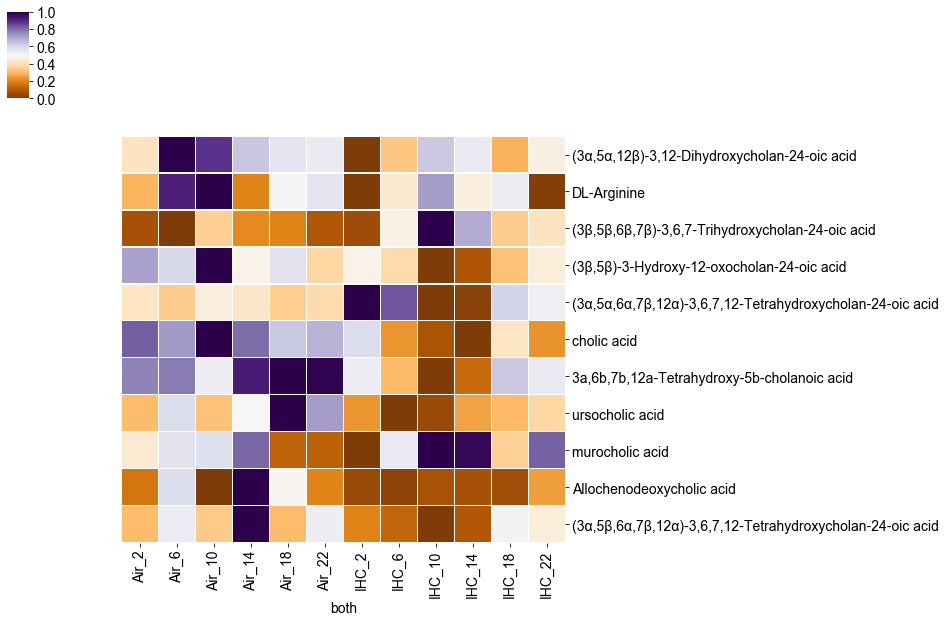

In [121]:
ax1 = sns.clustermap(together_adma, standard_scale=0, cmap="PuOr", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_adma_heatmap_mappedAir.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

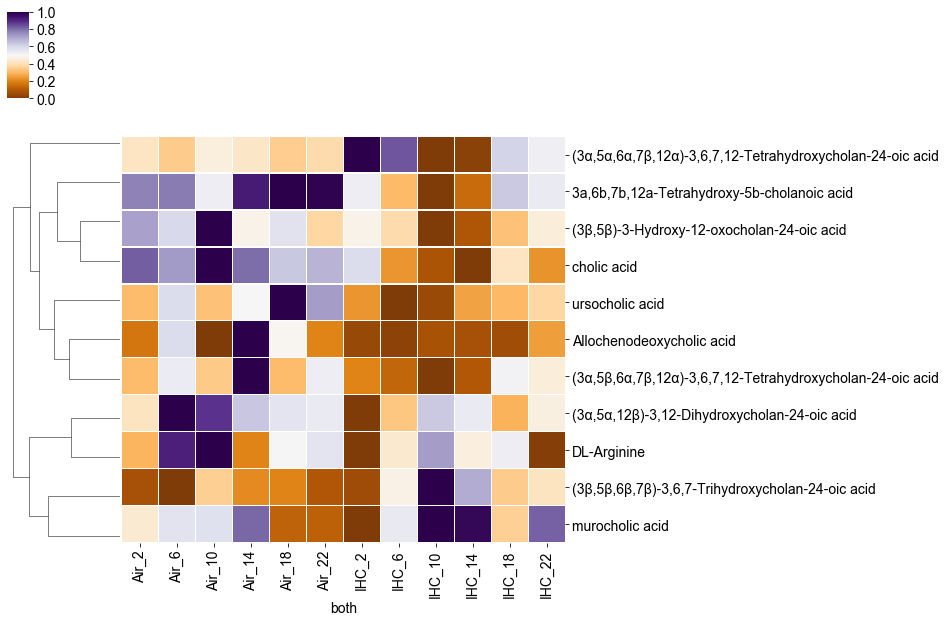

In [122]:
ax1 = sns.clustermap(together_adma, standard_scale=0, cmap="PuOr", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_adma_heatmap.svg', dpi=300, bbox_inches="tight")
#allows reordering of rows
#standard scale subtracts the minimul and divides every row by maximum